In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")


In [29]:
df = pd.read_csv("car details v4.csv")  # path to your dataset
print("Shape of Data:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

print("\nColumn Names:", df.columns.tolist())

Shape of Data: (2059, 20)

First 5 Rows:
             Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power     

In [45]:
print("\nMissing Values:\n", df.isnull().sum())
print("\n🔍 Checking missing values before model training:\n")


# Option 1: Fill missing numeric values with median
X = X.fillna(X.median())

# Option 2: (Optional) Drop rows if they still have NaN after fill
X = X.dropna()

print("\n✅ Missing values handled. Ready for model training.")


Missing Values:
 Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

🔍 Checking missing values before model training:


✅ Missing values handled. Ready for model training.


In [50]:
df = df.dropna()
print(df.shape)

(2059, 20)


In [52]:
print(df.head())

   Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     7    106   505000  2017   0.976434          6             1        56   
1    19    802   450000  2014   0.727230          2             1        40   
2     8   1030   220000  2011   0.548371          6             1        39   
3    30    492   799000  2019  -0.268949          6             1        41   
4    30    548  1950000  2018   0.594340          2             1        45   

   Color     Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
0      7 -0.476178    -5.675357       7        312           5           1   
1     15  1.768917     0.176200       9        289          77           1   
2      8 -0.476178     0.176200       6        301          11           1   
3     13 -0.476178     0.176200       6        305          15           1   
4      7 -0.476178     0.176200      60         78         167           2   

   Length   Width  Height  Seating Capacity  Fuel Tank C

In [47]:
duplicate_count = df.duplicated().sum()
print(f"\n🔍 Number of duplicate rows: {duplicate_count}")



🔍 Number of duplicate rows: 0


In [48]:
print("\n📊 Statistical Summary:\n", df.describe())


📊 Statistical Summary:
               Make        Model         Price         Year     Kilometer  \
count  2059.000000  2059.000000  2.059000e+03  2059.000000  2.059000e+03   
mean     15.039339   526.496357  1.702992e+06  2016.425449  5.422471e+04   
std       9.170870   308.230213  2.419881e+06     3.363564  5.736172e+04   
min       0.000000     0.000000  4.900000e+04  1988.000000  0.000000e+00   
25%       8.000000   256.500000  4.849990e+05  2014.000000  2.900000e+04   
50%      18.000000   514.000000  8.250000e+05  2017.000000  5.000000e+04   
75%      21.000000   809.500000  1.925000e+06  2019.000000  7.200000e+04   
max      32.000000  1049.000000  3.500000e+07  2022.000000  2.000000e+06   

         Fuel Type  Transmission     Location        Color        Owner  \
count  2059.000000   2059.000000  2059.000000  2059.000000  2059.000000   
mean      3.799903      0.550267    32.214667    10.463332     1.465274   
std       2.059320      0.497588    19.286686     5.379296     0.

Make → Skewness: 0.03


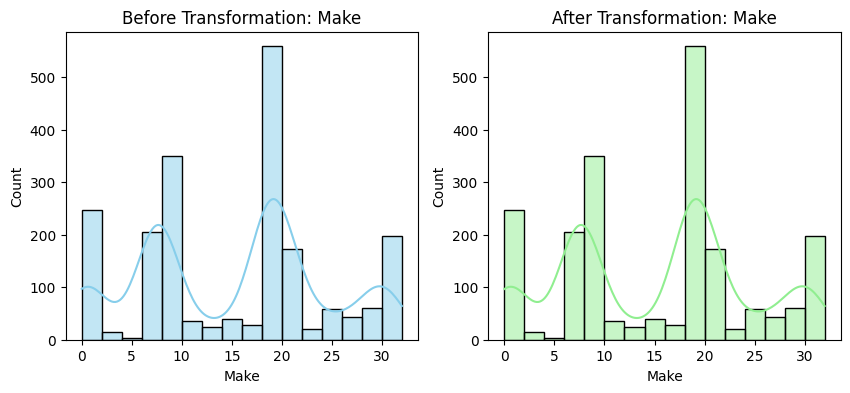

Model → Skewness: -0.02


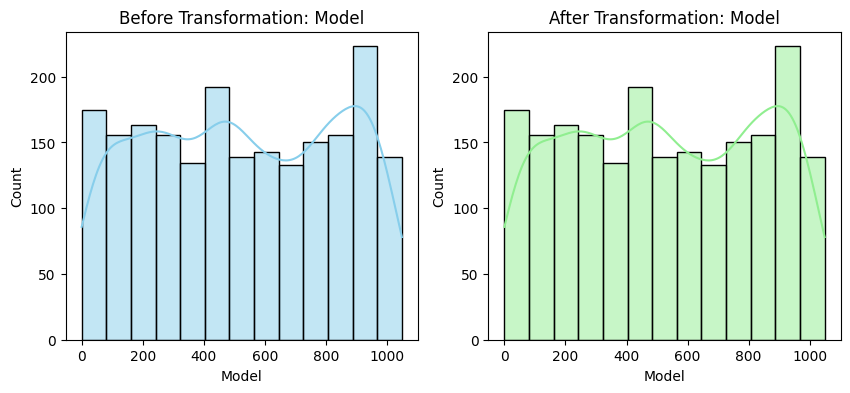

Year → Skewness: -0.84


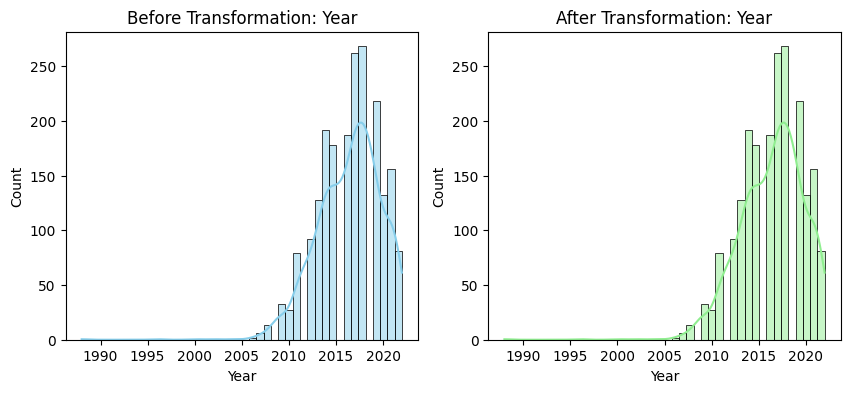

Kilometer → Skewness: 20.98
→ Kilometer transformed using Yeo-Johnson


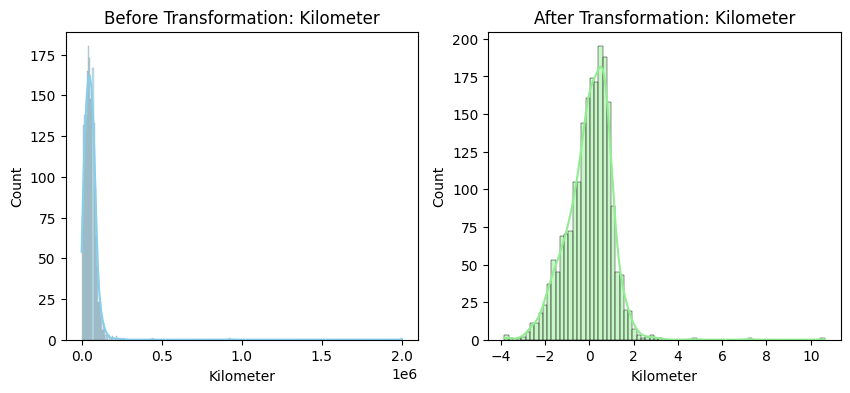

Fuel Type → Skewness: 0.07


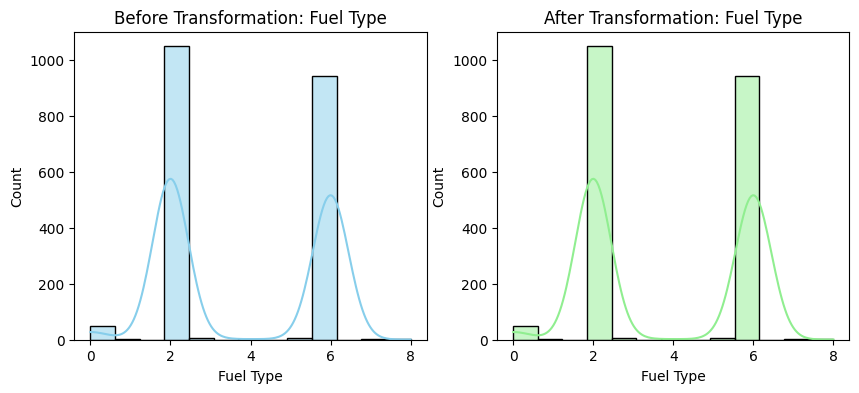

Transmission → Skewness: -0.20


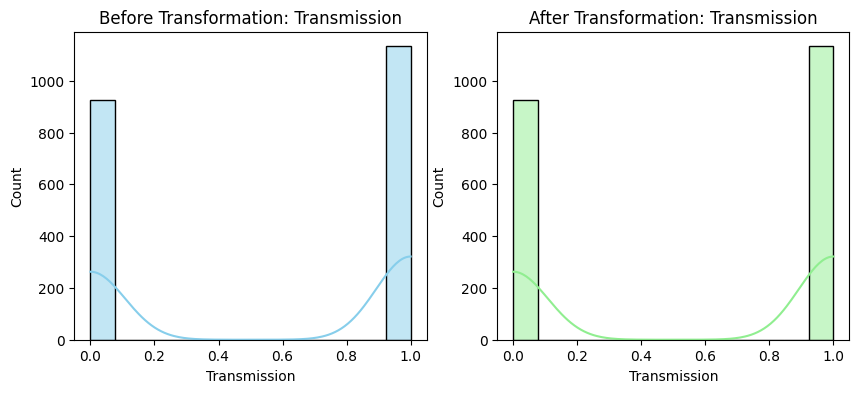

Location → Skewness: 0.13


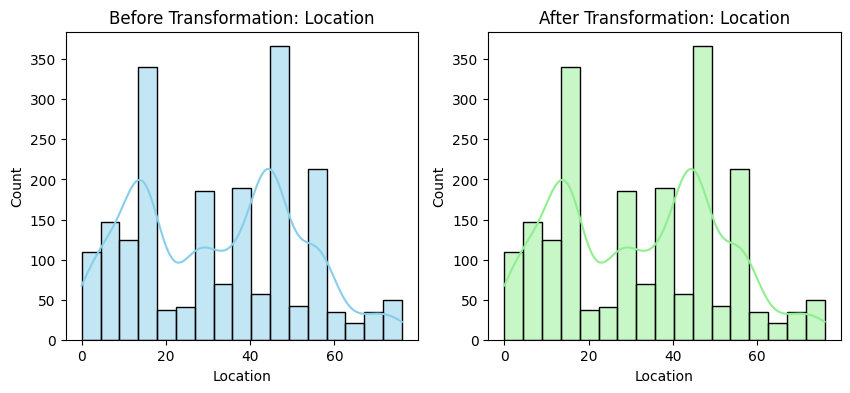

Color → Skewness: -0.69


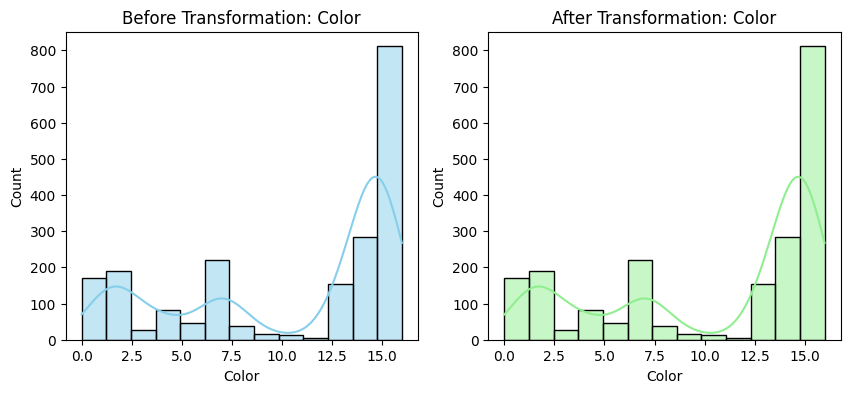

Owner → Skewness: 1.71
→ Owner transformed using Yeo-Johnson


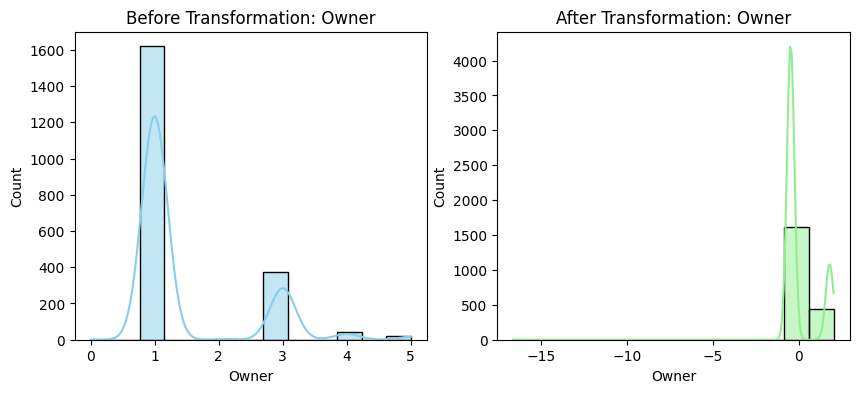

Seller Type → Skewness: -6.29
→ Seller Type transformed using Yeo-Johnson


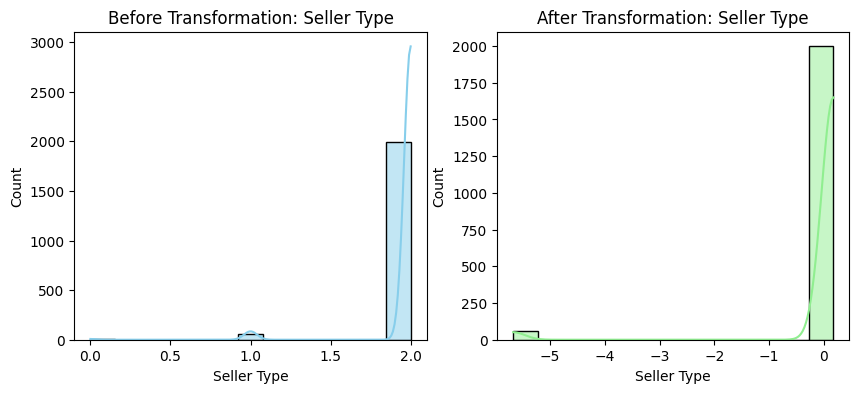

Engine → Skewness: 0.65


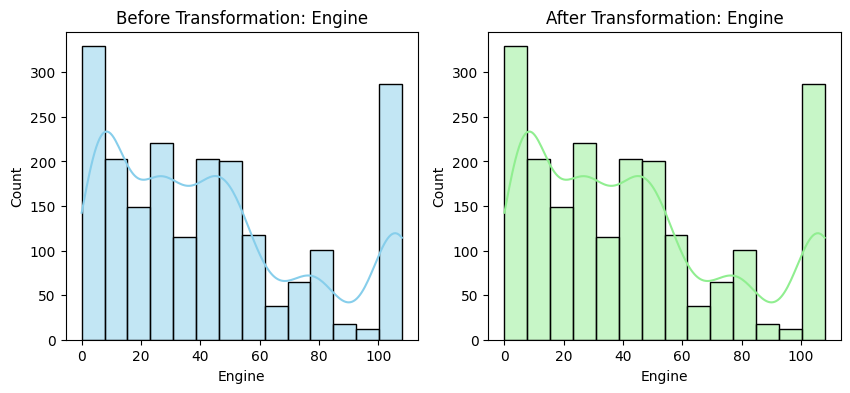

Max Power → Skewness: -0.14


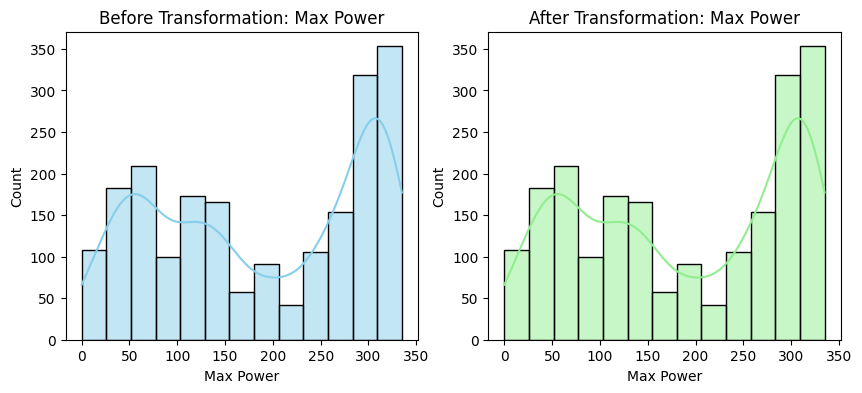

Max Torque → Skewness: 0.15


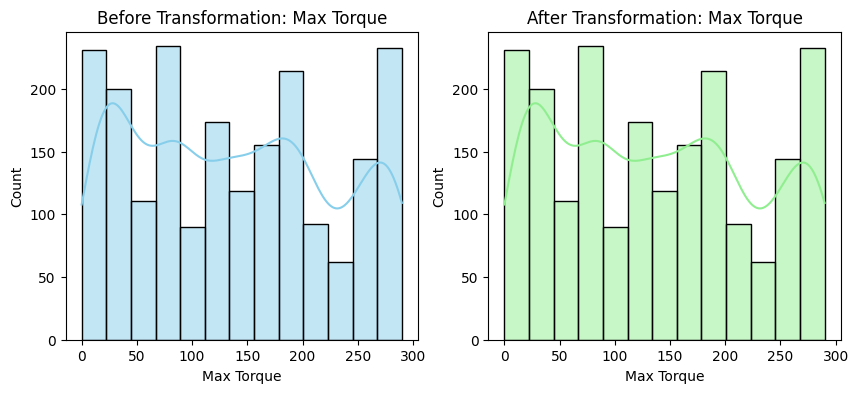

Drivetrain → Skewness: 0.79


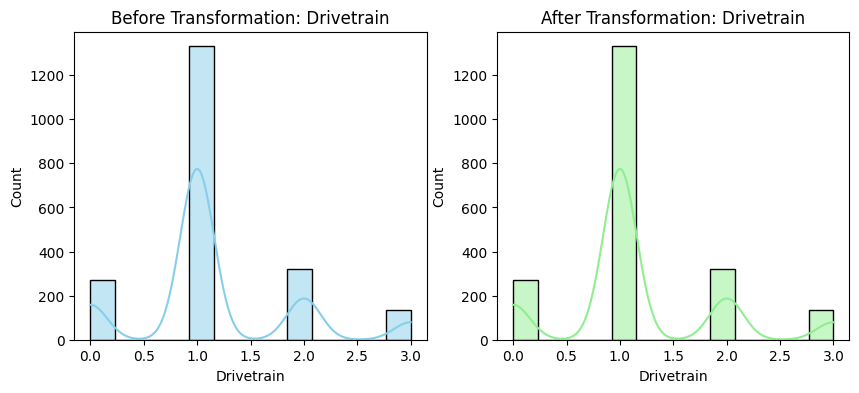

Length → Skewness: -0.04


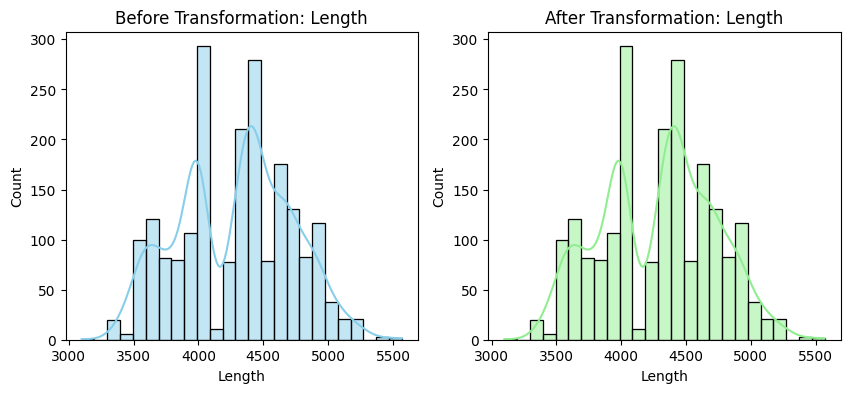

Width → Skewness: 0.31


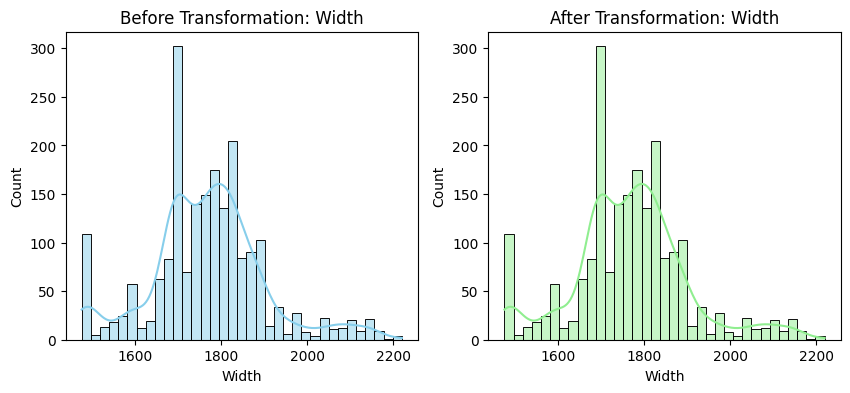

Height → Skewness: 0.88


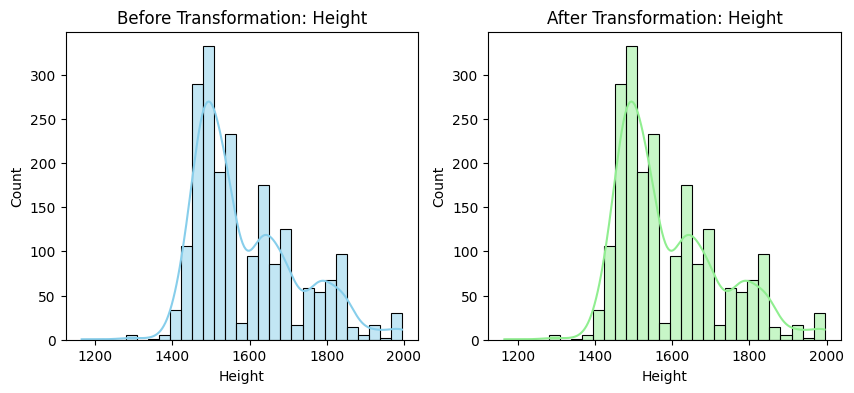

Seating Capacity → Skewness: 1.52
→ Seating Capacity transformed using Yeo-Johnson


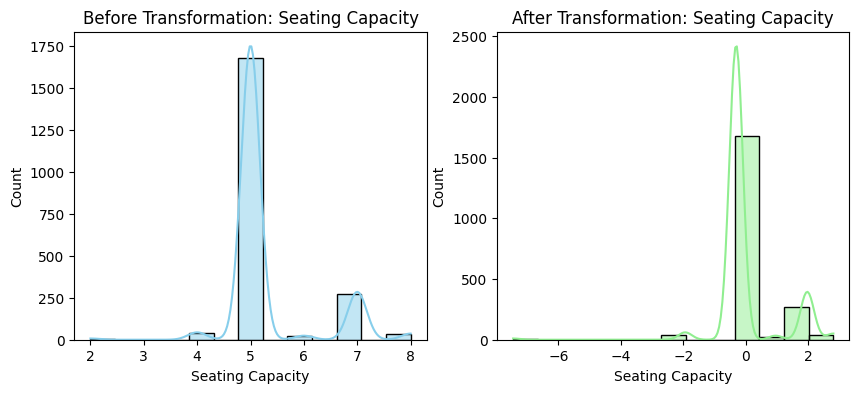

Fuel Tank Capacity → Skewness: 0.90


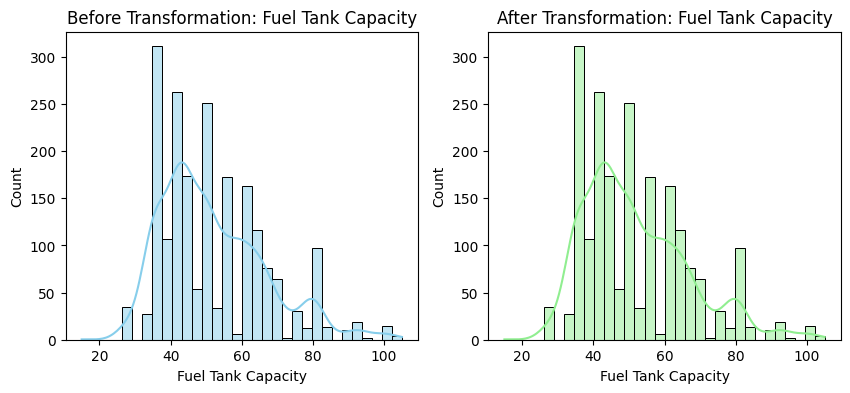

In [49]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Price')
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Before Transformation: {col}")
    
    # Check skewness
    skew = df[col].skew()
    print(f"{col} → Skewness: {skew:.2f}")

    # Apply transformation if not normal
    if abs(skew) > 1:
        pt = PowerTransformer(method='yeo-johnson')
        df[col] = pt.fit_transform(df[[col]]).flatten()
        print(f"→ {col} transformed using Yeo-Johnson")

    plt.subplot(1,2,2)
    sns.histplot(df[col], kde=True, color='lightgreen')
    plt.title(f"After Transformation: {col}")
    plt.show()

    

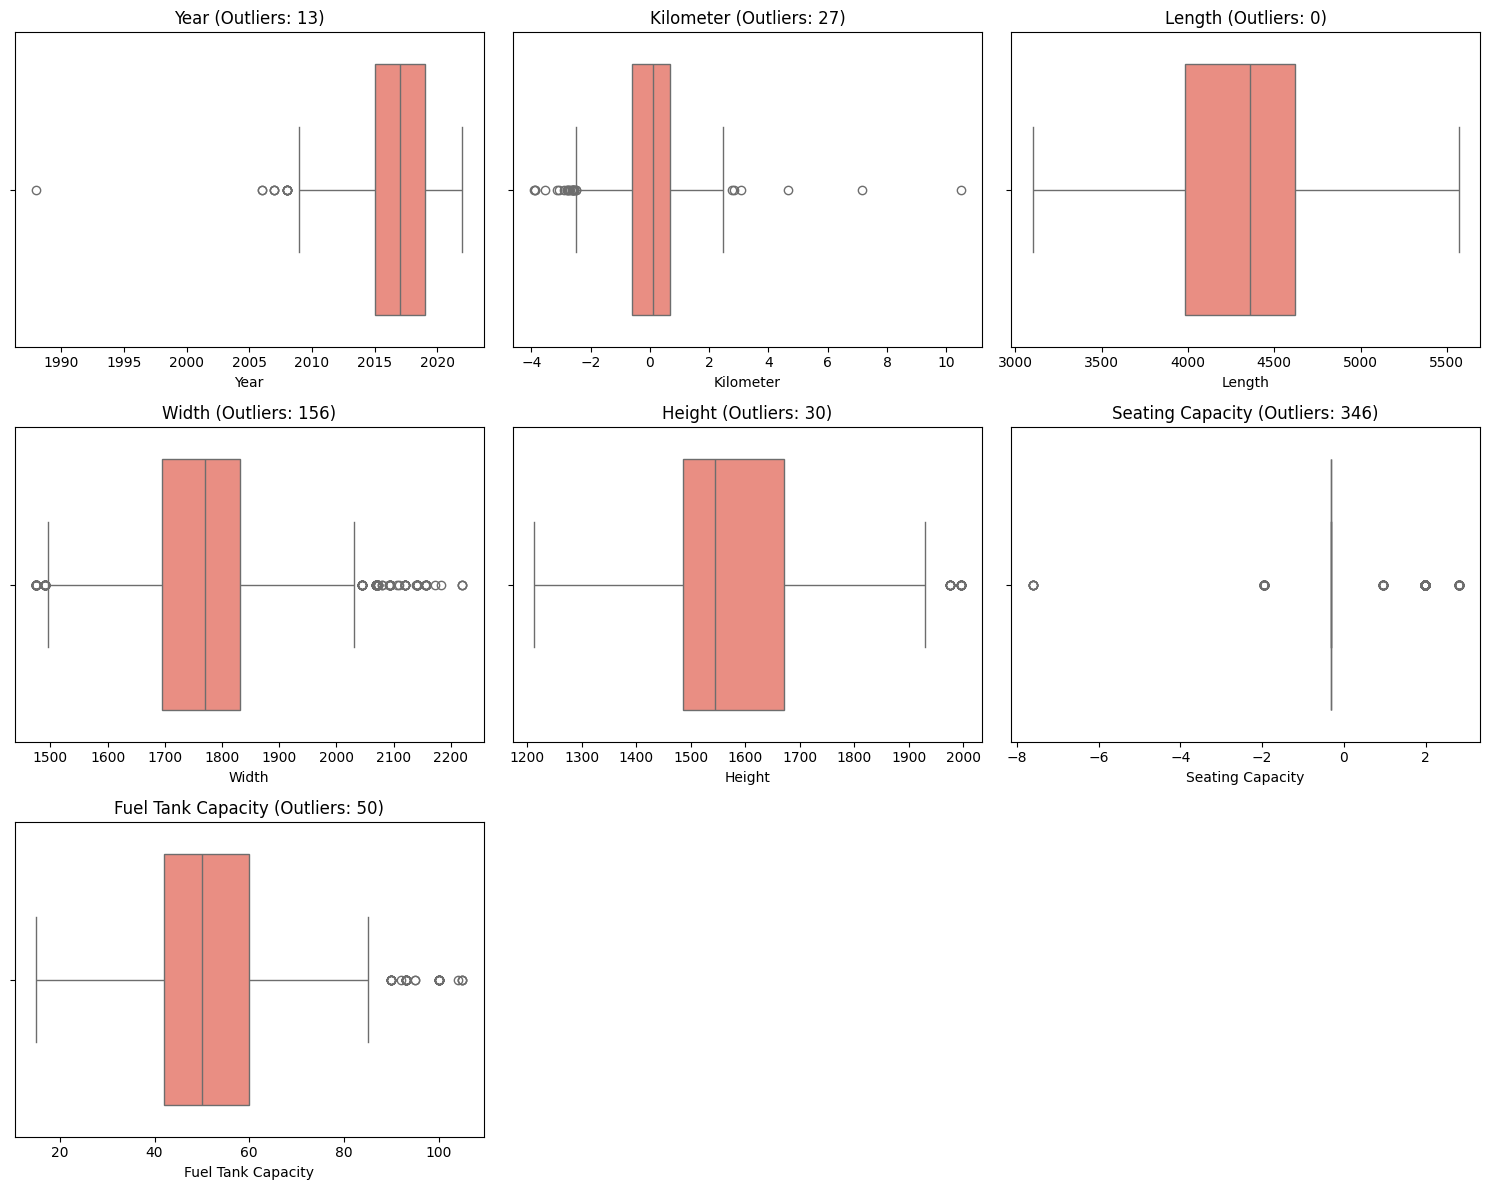


Outlier Summary (number of outliers per feature):
 {'Year': 13, 'Kilometer': 27, 'Length': 0, 'Width': 156, 'Height': 30, 'Seating Capacity': 346, 'Fuel Tank Capacity': 50}


In [35]:
n_cols = 3  # number of subplot columns
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # compute rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

outlier_summary = {}
for i, col in enumerate(numeric_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)
    
    sns.boxplot(x=df[col], color='salmon', ax=axes[i])
    axes[i].set_title(f"{col} (Outliers: {len(outliers)})")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("\nOutlier Summary (number of outliers per feature):\n", outlier_summary)

In [36]:
df = pd.read_csv("car details v4.csv") 
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# THEN split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("🔍 Checking for NaNs in the dataset...\n")
print(df.isna().sum())

# Total NaNs in the dataset
print("\nTotal missing values:", df.isna().sum().sum())


🔍 Checking for NaNs in the dataset...

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Max Power               0
Max Torque              0
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Total missing values: 369


In [38]:
# 🧹 Fill missing numeric columns with median and categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ All missing values filled successfully.")
print(df.isna().sum().sum(), "missing values remaining.")



✅ All missing values filled successfully.
0 missing values remaining.


In [39]:
print("🔎 Any NaNs in X_train?", X_train.isna().sum().sum())
print("🔎 Any NaNs in X_test?", X_test.isna().sum().sum())
print("🔎 Any NaNs in y_train?", y_train.isna().sum())
print("🔎 Any NaNs in y_test?", y_test.isna().sum())


🔎 Any NaNs in X_train? 298
🔎 Any NaNs in X_test? 71
🔎 Any NaNs in y_train? 0
🔎 Any NaNs in y_test? 0


In [40]:
print("🔍 Columns with NaNs in X_train:\n", X_train.columns[X_train.isna().any()].tolist())
print("\nNaN count per column:\n", X_train.isna().sum()[X_train.isna().sum() > 0])


🔍 Columns with NaNs in X_train:
 ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

NaN count per column:
 Length                52
Width                 52
Height                52
Seating Capacity      52
Fuel Tank Capacity    90
dtype: int64


In [41]:
# ✅ Fill missing numeric columns with median
numeric_nan_cols = ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

for col in numeric_nan_cols:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

# ✅ Verify all NaNs are gone
print("NaNs remaining in X_train:", X_train.isna().sum().sum())
print("NaNs remaining in X_test:", X_test.isna().sum().sum())


NaNs remaining in X_train: 0
NaNs remaining in X_test: 0


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

print("🚀 Training Gradient Boosting Model...")
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters:", grid_search.best_params_)
print("✅ Best R² Score:", grid_search.best_score_)

🚀 Training Gradient Boosting Model...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
✅ Best R² Score: 0.8742481123666519


In [43]:
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


📊 Model Evaluation Results:
RMSE: 994056.13
R² Score: 0.859


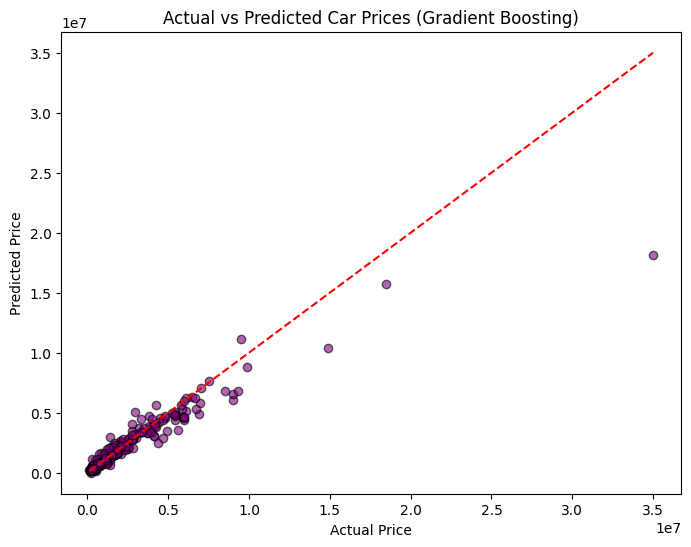

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Gradient Boosting)")
plt.show()